<a href="https://colab.research.google.com/github/rajatrai30/uber-cabs-data-analysis-using-R/blob/master/BDA_PROJECT_2023_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data Analytics PROJECT 2023**
# **Uber Cabs Data Analysis using R Programming**
## By Yash Patil, Rajat Rai, Ishika Raikar, Himansu Sahoo

**R'S MAGIC COMMAND**

In [ ]:
# R's Magic Command to Run Jupyter Notebooks
%load_ext rpy2.ipython

**IMPORT LIBRARIES**

In [ ]:
%%R
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

https://r-graphics.org





Error in library(ggthemes) : there is no package called ‘ggthemes’


In [ ]:
%%R
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")
colors

[1] "#CC1011" "#665555" "#05a399" "#cfcaca" "#f5e840" "#0683c9" "#e075b0"


In [ ]:
%%R
getwd()

[1] "/content"


In [ ]:
%%R
apr <- read.csv("uber-raw-data-apr14.csv")
may <- read.csv("uber-raw-data-may14.csv")
june <- read.csv("uber-raw-data-jun14.csv")
july <- read.csv("uber-raw-data-jul14.csv")
aug <- read.csv("uber-raw-data-aug14.csv")
sept <- read.csv("uber-raw-data-sep14.csv")

In [ ]:
%%R
# Combine the data together
data <- rbind(apr, may, june, july, aug, sept)
cat("The dimensions of the data are:", dim(data))

The dimensions of the data are: 411314 4

In [ ]:
%%R
# Print the first 6 rows of the data
head(data)

         Date.Time     Lat      Lon   Base
1 4/1/2014 0:11:00 40.7690 -73.9549 B02512
2 4/1/2014 0:17:00 40.7267 -74.0345 B02512
3 4/1/2014 0:21:00 40.7316 -73.9873 B02512
4 4/1/2014 0:28:00 40.7588 -73.9776 B02512
5 4/1/2014 0:33:00 40.7594 -73.9722 B02512
6 4/1/2014 0:33:00 40.7383 -74.0403 B02512


In [ ]:
# The data contains the columns Date.
# Time is a factor, Latitude, and Longitudes are double, and Base is a factor.
# we will format the DateTime into a more readable format using the Date Time conversion function.

In [ ]:
%%R
# Load the lubridate package
library(lubridate)

# Assuming you have a data frame named 'data' with a column 'Date.Time'
# Convert 'Date.Time' to POSIXct
data$Date.Time <- as.POSIXct(data$Date.Time, format="%m/%d/%Y %H:%M:%S")

# Extract the 'Time' component as a formatted string
data$Time <- format(data$Date.Time, format="%H:%M:%S")

# Now, 'ymd_hms' should work because you've loaded 'lubridate' and 'Date.Time' is already in the POSIXct format.
data$Date.Time <- ymd_hms(data$Date.Time)

# Print the first few rows of the data
head(data)

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




            Date.Time     Lat      Lon   Base     Time
1 2014-04-01 00:11:00 40.7690 -73.9549 B02512 00:11:00
2 2014-04-01 00:17:00 40.7267 -74.0345 B02512 00:17:00
3 2014-04-01 00:21:00 40.7316 -73.9873 B02512 00:21:00
4 2014-04-01 00:28:00 40.7588 -73.9776 B02512 00:28:00
5 2014-04-01 00:33:00 40.7594 -73.9722 B02512 00:33:00
6 2014-04-01 00:33:00 40.7383 -74.0403 B02512 00:33:00


In [ ]:
%%R
# Create individual columns for month day and year
data$day <- factor(day(data$Date.Time))
data$month <- factor(month(data$Date.Time, label=TRUE))
data$year <- factor(year(data$Date.Time))
data$dayofweek <- factor(wday(data$Date.Time, label=TRUE))
head(data)

            Date.Time     Lat      Lon   Base     Time day month year dayofweek
1 2014-04-01 00:11:00 40.7690 -73.9549 B02512 00:11:00   1   Apr 2014       Tue
2 2014-04-01 00:17:00 40.7267 -74.0345 B02512 00:17:00   1   Apr 2014       Tue
3 2014-04-01 00:21:00 40.7316 -73.9873 B02512 00:21:00   1   Apr 2014       Tue
4 2014-04-01 00:28:00 40.7588 -73.9776 B02512 00:28:00   1   Apr 2014       Tue
5 2014-04-01 00:33:00 40.7594 -73.9722 B02512 00:33:00   1   Apr 2014       Tue
6 2014-04-01 00:33:00 40.7383 -74.0403 B02512 00:33:00   1   Apr 2014       Tue


In [ ]:
%%R
# Add Time variables as well
data$second = factor(second(hms(data$Time)))
data$minute = factor(minute(hms(data$Time)))
data$hour = factor(hour(hms(data$Time)))

In [ ]:
%%R
# Look at the data
head(data)

            Date.Time     Lat      Lon   Base     Time day month year dayofweek
1 2014-04-01 00:11:00 40.7690 -73.9549 B02512 00:11:00   1   Apr 2014       Tue
2 2014-04-01 00:17:00 40.7267 -74.0345 B02512 00:17:00   1   Apr 2014       Tue
3 2014-04-01 00:21:00 40.7316 -73.9873 B02512 00:21:00   1   Apr 2014       Tue
4 2014-04-01 00:28:00 40.7588 -73.9776 B02512 00:28:00   1   Apr 2014       Tue
5 2014-04-01 00:33:00 40.7594 -73.9722 B02512 00:33:00   1   Apr 2014       Tue
6 2014-04-01 00:33:00 40.7383 -74.0403 B02512 00:33:00   1   Apr 2014       Tue
  second minute hour
1      0     11    0
2      0     17    0
3      0     21    0
4      0     28    0
5      0     33    0
6      0     33    0


In [ ]:
%%R
# Load the dplyr package to use the pipe operator
library(dplyr)
# Plotting the trips by hours in a day
hourly_data <- data %>%
  group_by(hour) %>%
  summarize(Total = n())

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [ ]:
%%R
install.packages("DT")
library(DT)
# Show data in a searchable js table
datatable(hourly_data)

(as ‘lib’ is unspecified)












































	‘/tmp/RtmpiYkNMC/downloaded_packages’



**DATA VISUALIZATION**

In [ ]:
%%R
month_hour_data <- data %>% group_by(month, hour) %>%  dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


In [ ]:
%%R
day_data <- data %>% group_by(day) %>% dplyr::summarize(Trips = n())
day_data

# A tibble: 32 × 2
   day   Trips
   <fct> <int>
 1 1     46241
 2 2     51884
 3 3     52173
 4 4     48471
 5 5     33333
 6 6     12562
 7 7      9698
 8 8      6987
 9 9      7455
10 10     7338
# ℹ 22 more rows
# ℹ Use `print(n = ...)` to see more rows


**DATA COLLECTION**

In [ ]:
%%R
# Collect data by day of the week and month
day_month_data <- data %>% group_by(dayofweek, month) %>% dplyr::summarize(Trips = n())
# `summarise()` has grouped output by 'dayofweek'. You can override using the `.groups` argument.
day_month_data

`summarise()` has grouped output by 'dayofweek'. You can override using the
`.groups` argument.
# A tibble: 43 × 3
# Groups:   dayofweek [8]
   dayofweek month Trips
   <ord>     <ord> <int>
 1 Sun       Apr    6878
 2 Sun       May    7755
 3 Sun       Jun    9979
 4 Sun       Jul    5037
 5 Sun       Aug   10291
 6 Sun       Sep    3532
 7 Mon       Apr    6692
 8 Mon       May    3755
 9 Mon       Jun   11498
10 Mon       Jul    4491
# ℹ 33 more rows
# ℹ Use `print(n = ...)` to see more rows


**MONTHLY TRIPS IN A YEAR**

In [ ]:
%%R
# Number of Trips place during months in a year
month_data <- data %>% group_by(month) %>% dplyr::summarize(Total = n())

In [ ]:
%%R
month_data

# A tibble: 7 × 2
  month Total
  <ord> <int>
1 Apr   68493
2 May   68460
3 Jun   68587
4 Jul   68432
5 Aug   68575
6 Sep   68545
7 <NA>    222


**PRESENT DATA USING HEATMAP VISUALIZATION**

In [ ]:
%%R
## Heatmap visualization of day, hour and month
# Heatmap by Hour and Day
day_hour_data <- data %>% group_by(day, hour) %>% dplyr::summarize(Total = n())

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


In [ ]:
%%R
datatable(day_hour_data)

In [ ]:
%%R
# Plot Heatmap by Day and Month
# Collect data by month and day
month_day_data <- data %>% group_by(month, day) %>% dplyr::summarize(Trips = n())

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


**PRESENT DATA USING HEATMAP VISUALIZATION**

In [ ]:
%%R
month_day_data

# A tibble: 184 × 3
# Groups:   month [7]
   month day   Trips
   <ord> <fct> <int>
 1 Apr   1      4747
 2 Apr   2      5860
 3 Apr   3      6979
 4 Apr   4      8975
 5 Apr   5      6810
 6 Apr   6      4636
 7 Apr   7      4123
 8 Apr   8      1023
 9 Apr   9      1167
10 Apr   10     1274
# ℹ 174 more rows
# ℹ Use `print(n = ...)` to see more rows


`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


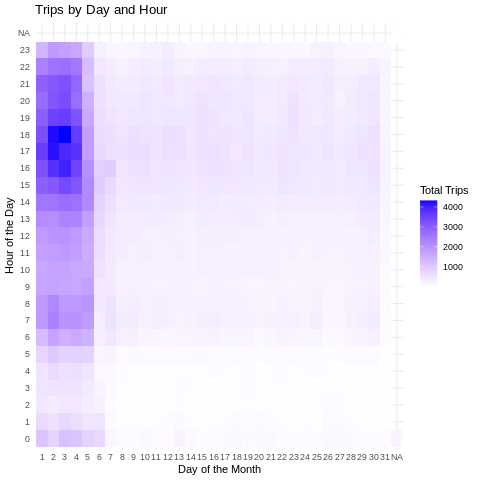

In [25]:
# HEATMAP DISTRIBUTION
# Heatmap for Trips by Day and Hour:
%%R
day_hour_data <- data %>%
  group_by(day, hour) %>%
  dplyr::summarize(Total = n())

ggplot(day_hour_data, aes(x = day, y = hour, fill = Total)) +
  geom_tile() +
  labs(title = "Trips by Day and Hour",
       x = "Day of the Month",
       y = "Hour of the Day",
       fill = "Total Trips") +
  theme_minimal() +
  scale_fill_gradient(low = "white", high = "blue")

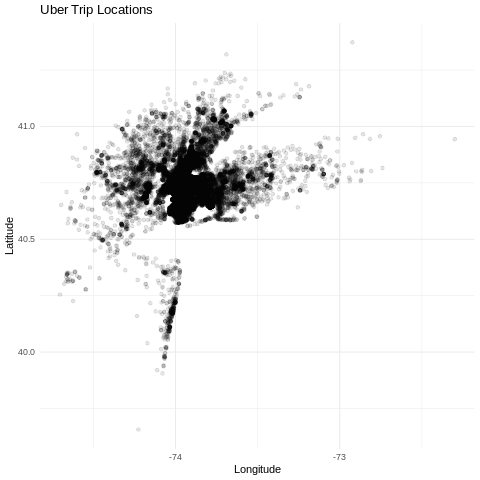

In [26]:
# SCATTER PLOTTING
# Scatter Plot for Trip Locations:
%%R
ggplot(data, aes(x = Lon, y = Lat)) +
  geom_point(alpha = 0.1) +
  labs(title = "Uber Trip Locations",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal()

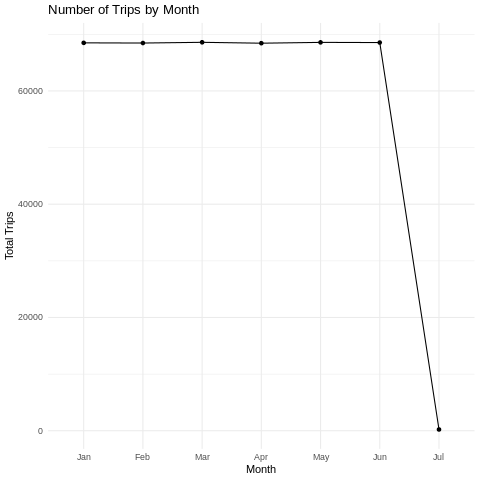

In [24]:
# USING GGPLOT2 FOR DATA VISUALIZATION
#  Total number of trips in each month.
%%R
# Loading the required library for plotting
library(ggplot2)

# Aggregate the data by month and calculate the number of trips
month_data <- data %>% group_by(month) %>% summarise(Total = n())

# Create a line chart
ggplot(month_data, aes(x = month, y = Total, group = 1)) +
  geom_line() +
  geom_point() +
  labs(title = "Number of Trips by Month",
       x = "Month",
       y = "Total Trips") +
  scale_x_discrete(labels = month.abb) +
  theme_minimal()

**Dataset Link**
https://drive.google.com/drive/folders/1UW1j-wsxGksryXlOpAsgTUq-lEwtgLQt?usp=sharing